In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances
np.set_printoptions(suppress = True) # to avoid the number in exponenet form

In [17]:
data = pd.read_csv('tsne_score.csv')

In [18]:
data.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


<Axes: xlabel='t-SNE-1', ylabel='t-SNE-2'>

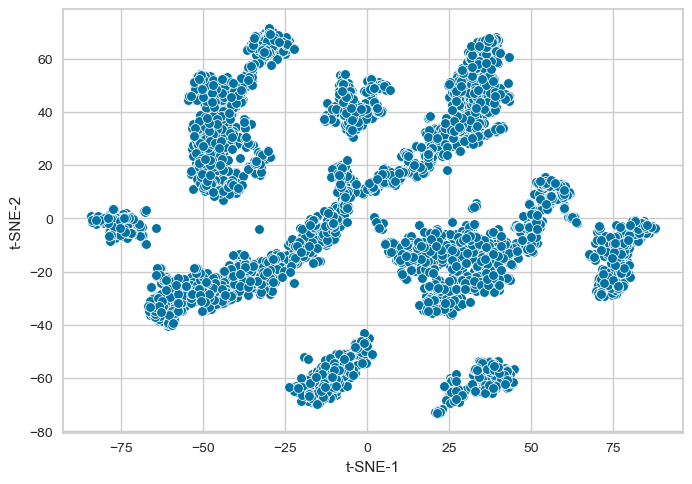

In [19]:
sns.scatterplot(x=data['t-SNE-1'],y=data['t-SNE-2'])

## KMeans Clustering
#### Finding optimum value of K
###### Elbow Method

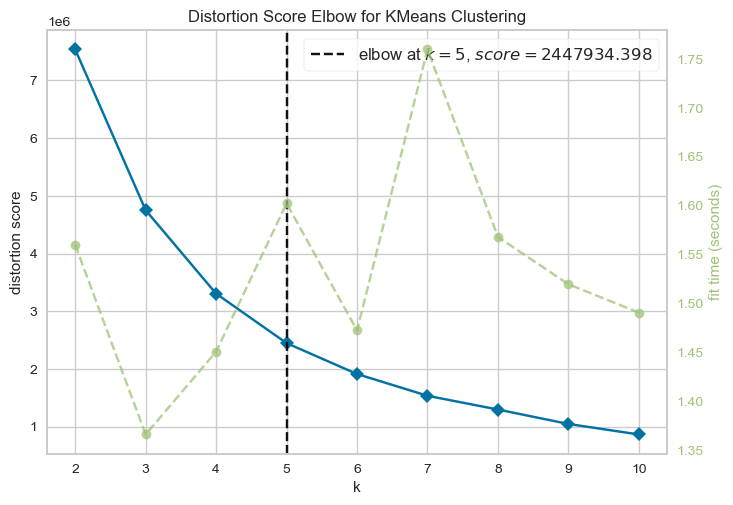

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
k_elbow = KElbowVisualizer(KMeans(),k=10)
k_elbow.fit(data)
k_elbow.show()

###### Silhouette Score

In [6]:
silo_score = []
for i in range(2,25):
    model = KMeans(n_clusters=i)
    model.fit(data)
    pred = model.predict(data)
    silo_score.append(silhouette_score(data,pred))

In [7]:
silo_score

[0.39192759237532815,
 0.42114609415352633,
 0.44651523908279983,
 0.46257979460303916,
 0.47222394474483564,
 0.4941826985787323,
 0.5270443030633077,
 0.5318715470324035,
 0.5226622432542251,
 0.5346873704535718,
 0.5520277009881246,
 0.5541833981854541,
 0.5497167812194313,
 0.5559890854916755,
 0.5457745293252881,
 0.5430233935092359,
 0.548115011783907,
 0.5433235379776724,
 0.5346418281313425,
 0.5346800986702208,
 0.5102788595572789,
 0.5100502320119467,
 0.5164582316131076]

###### Silhouette Visualizer

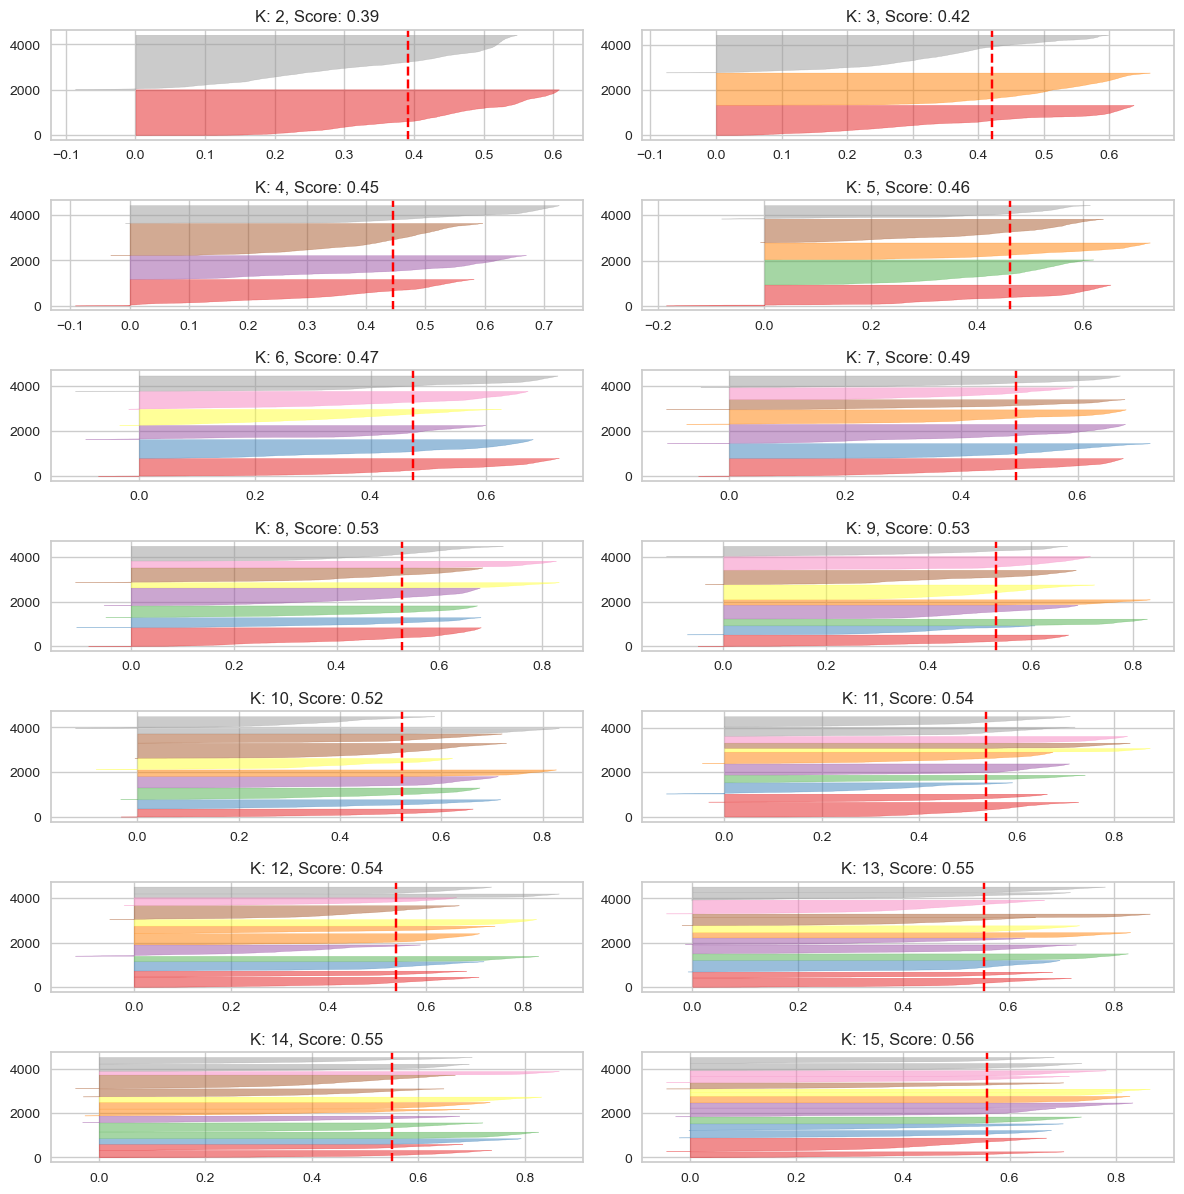

In [8]:
plt.figure(figsize=(12,17))


t = 1
for i in range(2,16):
    plt.subplot(10,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data)
    plt.title('K: %d, Score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [9]:
mod = KMeans(n_clusters=8)
data['pred_kmean']=mod.fit_predict(data)

In [10]:
centroids = mod.cluster_centers_

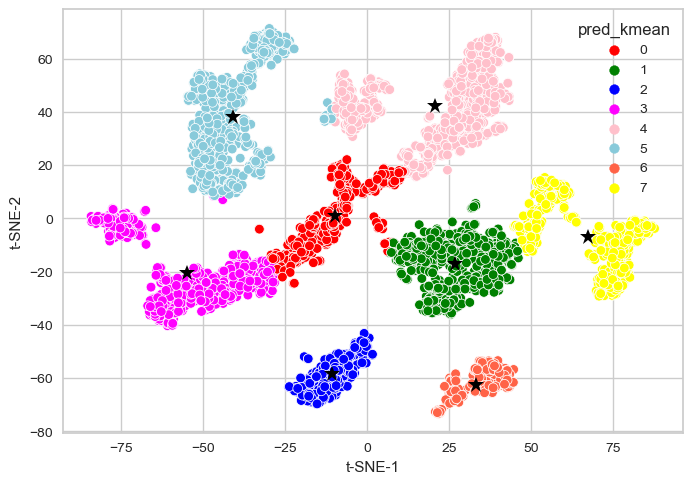

In [11]:
sns.scatterplot(x=data['t-SNE-1'],y=data['t-SNE-2'],
                hue=data['pred_kmean'],palette=['red','green','blue','magenta','pink','c','tomato','yellow'])
for i in range(8):
    plt.plot(centroids[i][0],centroids[i][1],color = 'black',marker = '*',ms=12)
plt.show()

### Aggloromative:

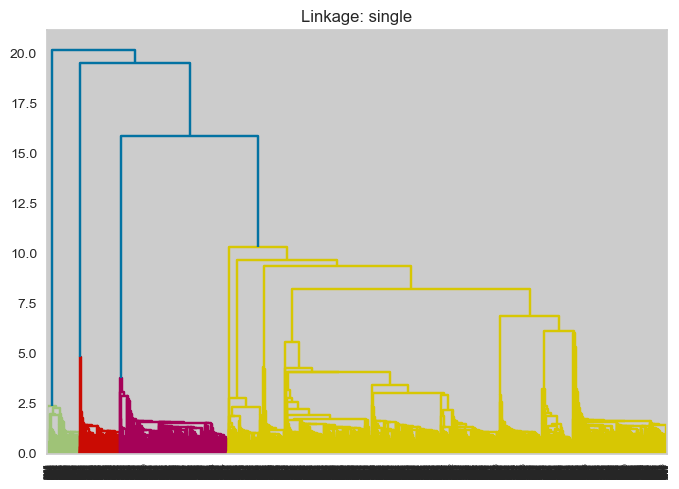

In [12]:
link_mat = linkage(data,method='single')
plt.title('Linkage: single')
dendrogram(link_mat)
#plt.axhline(y=12.5,ls = '--',color = 'cyan')
#plt.axhline(y=2.8,ls = '--',color = 'cyan')

plt.show()

In [13]:
final_agglo = AgglomerativeClustering(n_clusters=9,linkage='single')
data['Pred_Agglo'] = final_agglo.fit_predict(data)
data['Pred_Agglo'].value_counts()

1    1525
0     889
3     769
8     301
2     289
5     246
7     232
6     153
4       2
Name: Pred_Agglo, dtype: int64

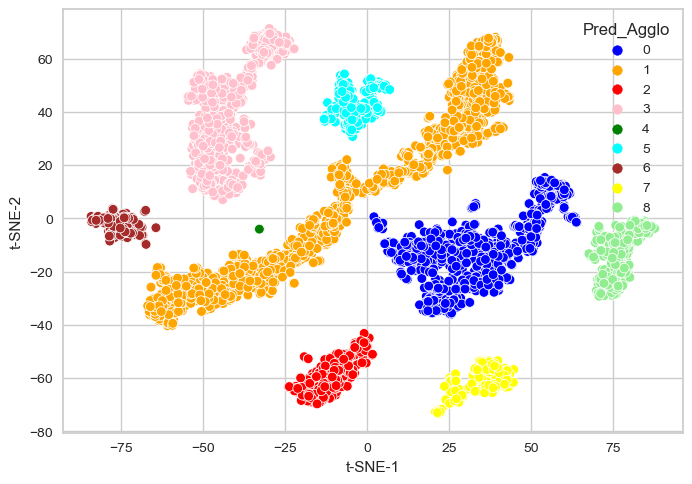

In [14]:
sns.scatterplot(x = data['t-SNE-1'],y=data['t-SNE-2'], hue = data['Pred_Agglo'], 
                palette = ['blue','orange','red','pink','green','cyan','brown','yellow','lightgreen']);

In [34]:
data

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376
...,...,...
4401,-15.211057,-69.717155
4402,-9.403443,-62.847458
4403,-17.546083,-10.295582
4404,-8.512799,16.375420


In [15]:
dist_matrix = euclidean_distances(data)
actual_dist = dist_matrix[np.triu_indices(4406,k=1)]

In [16]:
actual_dist.sort()

In [17]:
actual_dist

array([  0.0054063 ,   0.00578476,   0.00893038, ..., 171.81161205,
       171.98842711, 172.0320616 ])

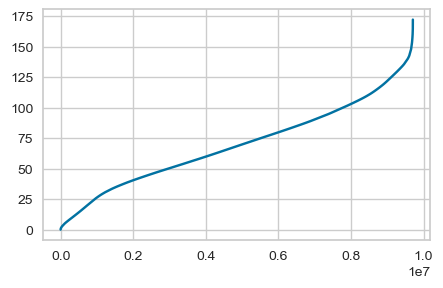

In [26]:
plt.figure(figsize=(5,3))
plt.plot(actual_dist)
plt.show()

In [21]:
data = pd.read_csv('tsne_score.csv')

In [30]:
data.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


## DBSCAN

In [22]:
from sklearn.cluster import DBSCAN


In [23]:
epsilon = range(2,7)
min_samples = range(9,20)

for i in epsilon:
    for j in min_samples:
        model = DBSCAN(eps=i,min_samples=j)
        pred = model.fit_predict(data)
        sil = silhouette_score(data,pred)
        print(f'Epsilon {i} and min samples {j}: Silohuette Score {round(sil,2)}')
        

Epsilon 2 and min samples 9: Silohuette Score 0.04
Epsilon 2 and min samples 10: Silohuette Score 0.14
Epsilon 2 and min samples 11: Silohuette Score 0.15
Epsilon 2 and min samples 12: Silohuette Score 0.17
Epsilon 2 and min samples 13: Silohuette Score 0.17
Epsilon 2 and min samples 14: Silohuette Score 0.12
Epsilon 2 and min samples 15: Silohuette Score 0.07
Epsilon 2 and min samples 16: Silohuette Score -0.02
Epsilon 2 and min samples 17: Silohuette Score -0.09
Epsilon 2 and min samples 18: Silohuette Score -0.22
Epsilon 2 and min samples 19: Silohuette Score -0.33
Epsilon 3 and min samples 9: Silohuette Score 0.01
Epsilon 3 and min samples 10: Silohuette Score 0.01
Epsilon 3 and min samples 11: Silohuette Score 0.01
Epsilon 3 and min samples 12: Silohuette Score 0.07
Epsilon 3 and min samples 13: Silohuette Score 0.03
Epsilon 3 and min samples 14: Silohuette Score 0.3
Epsilon 3 and min samples 15: Silohuette Score 0.21
Epsilon 3 and min samples 16: Silohuette Score 0.21
Epsilon 3 a

In [24]:
# eps = 6 min samples = 10
final_dbscan = DBSCAN(eps=6,min_samples=10)
pred = final_dbscan.fit_predict(data)



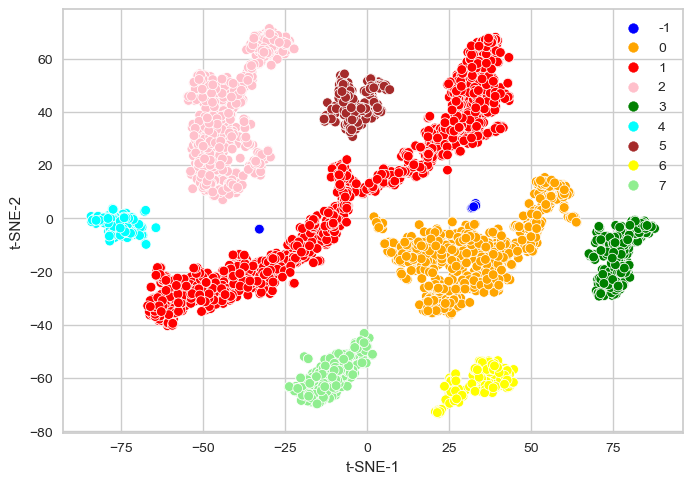

In [25]:
sns.scatterplot(x = data['t-SNE-1'],y=data['t-SNE-2'], hue = pred, 
                palette = ['blue','orange','red','pink','green','cyan','brown','yellow','lightgreen'],legend='full');

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors.fit(data)
distance,indices = neighbors.kneighbors(data)

In [28]:
dist = sorted(distance[:,1])

Text(0, 0.5, 'epsilon')

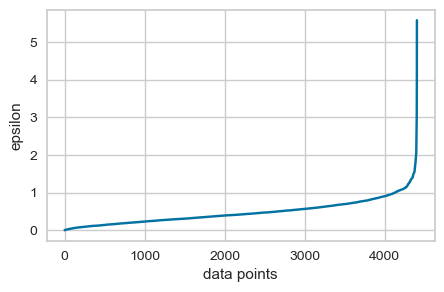

In [29]:
plt.figure(figsize=(5,3))
plt.plot(dist)
plt.xlabel('data points')
plt.ylabel('epsilon')

In [15]:
print("\U0001F628")

😨
